In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.linear_model import PassiveAggressiveClassifier

In [2]:
#Reading data as pandas dataframe
frame = pd.read_csv('fake_or_real_news.csv')

#Inspecing Shape
frame.shape

#Inspecting top 5 rows
frame.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
#Setting the DataFrame index using one or more existing columns
frame = frame.set_index("Unnamed: 0")
frame.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
y = frame.label
y.head()

Unnamed: 0
8476     FAKE
10294    FAKE
3608     REAL
10142    FAKE
875      REAL
Name: label, dtype: object

In [5]:
frame.drop("label", axis=1)
frame.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
X_train, X_test, y_train, y_test = train_test_split(frame['text'], y, test_size=0.33, random_state=53)

In [8]:
X_train.head()

Unnamed: 0
8055                                                     
5656    Report Copyright Violation Do you think there ...
669     The election in 232 photos, 43 numbers and 131...
5630    Email Ever wonder what’s on the mind of today’...
9797    Wells Fargo is Rotting from the Top Down Wells...
Name: text, dtype: object

In [9]:
y_train.head()

Unnamed: 0
8055    FAKE
5656    FAKE
669     REAL
5630    FAKE
9797    FAKE
Name: label, dtype: object

# Building Vectorizer Classifiers

## Count Vectorizer

In [10]:
# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data.
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test set 
count_test = count_vectorizer.transform(X_test)

In [11]:
#print(count_test)

## TF-IDF Vectorizer

In [12]:
# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [13]:
#print(tfidf_test)

# Values of Token Generated by Both The Vectorizers Are Same

In [14]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
difference = set(count_df.columns) - set(tfidf_df.columns)
difference
set()
print(count_df.equals(tfidf_df))
count_df.head()

False


,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Confusion Matrix

In [15]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Confusion Matrix With TF-IDF Vectorizer

accuracy:   0.857
Confusion matrix, without normalization


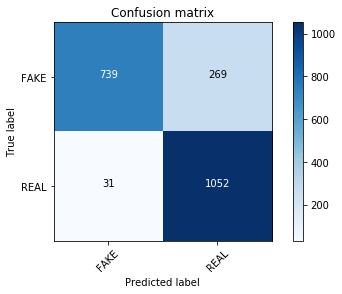

In [16]:
clf = MultinomialNB() 
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# Confusion Matrix With Count Vectorizer

accuracy:   0.893
Confusion matrix, without normalization


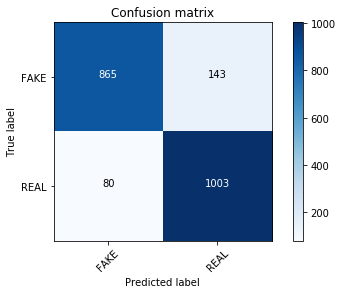

In [17]:
clf = MultinomialNB() 
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# Confusion Matrix With Passive Aggressive Classifier

accuracy:   0.937
Confusion matrix, without normalization


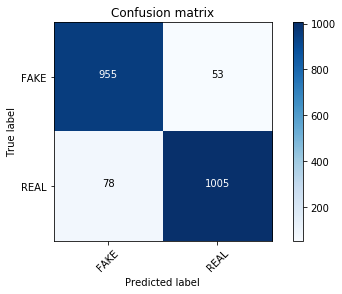

In [18]:
linear_clf = PassiveAggressiveClassifier(max_iter=50)
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [19]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)


FAKE -4.948449108924967 2016
FAKE -4.362413853840095 october
FAKE -4.170281360441068 hillary
FAKE -3.24913652104901 share
FAKE -2.9161406232054694 november
FAKE -2.903018926029603 article
FAKE -2.4706755921572325 oct
FAKE -2.4446187929145404 print
FAKE -2.3539671701699882 email
FAKE -2.213839664515754 source
FAKE -2.1485097979942944 advertisement
FAKE -2.147055117182178 war
FAKE -2.1394692935394075 wikileaks
FAKE -2.090731657942504 establishment
FAKE -2.0869152285056827 mosul
FAKE -2.052979958579218 podesta
FAKE -2.036538430246109 nov
FAKE -2.0152583890113323 election
FAKE -1.8200391961682976 pipeline
FAKE -1.774212000566179 donald
FAKE -1.7191347036152278 dakota
FAKE -1.7177630326103217 26
FAKE -1.690639268392845 corporate
FAKE -1.671964893415529 ayotte
FAKE -1.671235129125811 uk
FAKE -1.666022677615248 snip
FAKE -1.6542547671179562 jewish
FAKE -1.646143639940982 dr
FAKE -1.641106126721576 sources
FAKE -1.636305337494207 watch

REAL 4.778516370991939 said
REAL 2.6529169286204013 says


In [20]:
feature_names = tfidf_vectorizer.get_feature_names()
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

[(-4.477148234163137, 'said'),
 (-4.5936919152219655, 'trump'),
 (-4.98170150128453, 'clinton'),
 (-5.455931002028523, 'people'),
 (-5.482207812723569, 'president'),
 (-5.511414074572205, 'obama'),
 (-5.515621480853161, 'state'),
 (-5.5727798946931095, 'new'),
 (-5.63452121120962, 'campaign'),
 (-5.728156816243612, 'republican'),
 (-5.844483857160232, 'party'),
 (-5.949002396420198, 'sanders'),
 (-5.964034477506528, 'states'),
 (-5.97418288622825, 'time'),
 (-5.986816295469049, 'just'),
 (-5.9903983888515535, 'like'),
 (-6.067024557833956, 'house'),
 (-6.115534950553315, 'political'),
 (-6.126896127062493, 'percent'),
 (-6.172241591175732, 'republicans')]